In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/clean_data.csv", low_memory=False)

In [2]:
x = df[["pick_lat", "pick_lng"]]
x = x.iloc[:30000]

In [3]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

In [4]:
# Fit the model to the features
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [5]:
# Predict the cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [6]:
# Calculate the inertia
inertia = kmeans.inertia_

# Calculate the silhouette score
silhouette_avg = silhouette_score(x, cluster_labels)

# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(x, cluster_labels)

# Calculate the Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(x, cluster_labels)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Inertia: 2278.39567934125
Silhouette Score: 0.9349586561253688
Davies-Bouldin Index: 0.25770563118539325
Calinski-Harabasz Index: 238239.51398668176


/tmp/ipykernel_26397/246398541.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / 3)


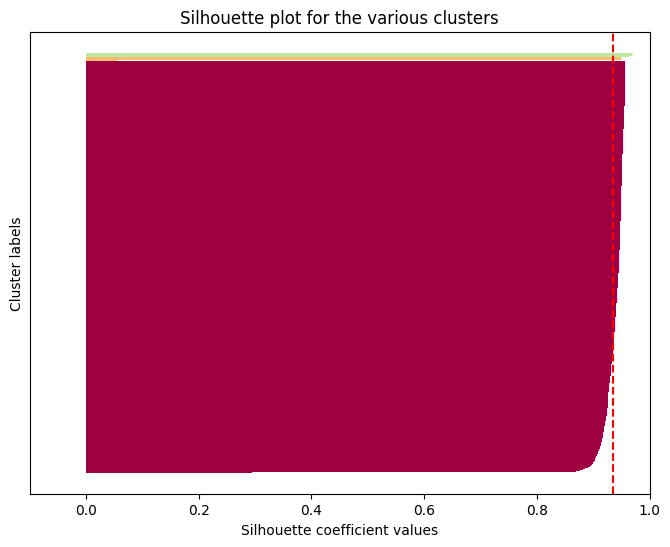

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Silhouette Analysis
silhouette_vals = silhouette_samples(x, cluster_labels)

# Create a bar plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(float(i) / 3)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlim([-0.1, 1])
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster labels")
plt.title("Silhouette plot for the various clusters")
plt.show()

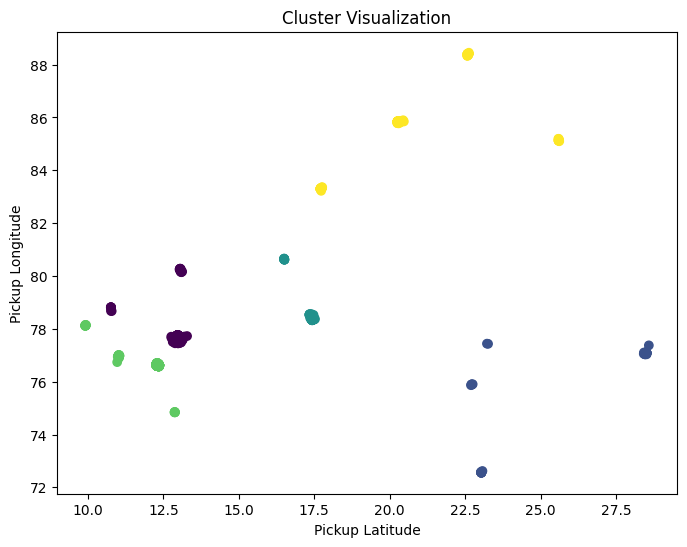

In [8]:
# Cluster Visualization (assuming x has 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("Pickup Latitude")
plt.ylabel("Pickup Longitude")
plt.title("Cluster Visualization")
plt.show()